In [1]:
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import numpy as np
import os
%matplotlib inline

In [9]:
image2 = Image.open('/home/evida/Documents/Sensorbox_V2/sensor-box/server/static/images/edited/041_1_13_giveDistance.png' )
width, height = image2.size
width

640

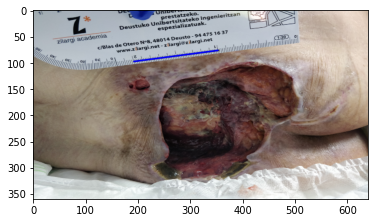

In [10]:
plt.imshow(image2)

In [92]:
mask_g=np.zeros([height,width])
mask_n=np.zeros([height,width])
mask_s=np.zeros([height,width])

In [103]:
np.array(image2).shape

(360, 640, 4)

In [108]:
reds=np.array(image2)[:,:,0]
greens=np.array(image2)[:,:,1]
blues=np.array(image2)[:,:,2]

In [124]:
mask_g = (reds == 255) & (greens ==0 ) &  (blues ==0)
mask_s = (reds == 255) & (greens ==255 ) &  (blues ==0)
mask_n = (reds == 128) & (greens ==0 ) &  (blues ==128)

In [125]:
mask_granulation = np.where(mask_g, 255, 0)
mask_slough = np.where(mask_s, 255, 0)
mask_necrosis = np.where(mask_n, 255, 0)

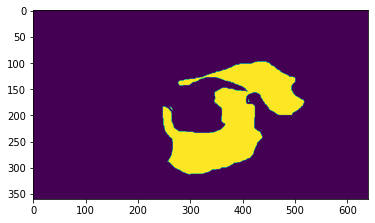

In [126]:
plt.imshow(mask_granulation)

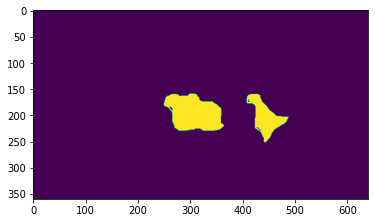

In [128]:
plt.imshow(mask_slough)

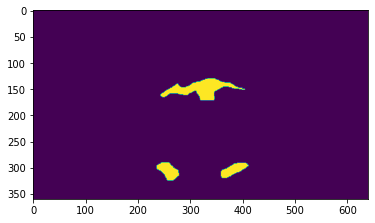

In [129]:
plt.imshow(mask_necrosis)

In [130]:
import imageio

image_store = imageio.imsave('server/static/images/tests/'+ 'mask_g.png', mask_granulation) 

Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


In [11]:
image2 = Image.open('/home/evida/Documents/Sensorbox_V2/sensor-box/server/static/images/edited/041_1_13_giveDistance.png' )
width, height = image2.size
width

640

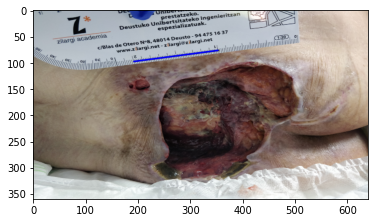

In [12]:
plt.imshow(image2)

In [13]:
reds=np.array(image2)[:,:,0]
greens=np.array(image2)[:,:,1]
blues=np.array(image2)[:,:,2]

In [14]:
mask_d = (reds == 0) & (greens ==0 ) &  (blues ==255)

In [16]:
mask_d = np.where(mask_d, 255, 0)

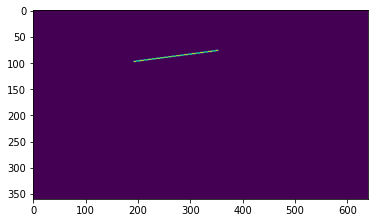

In [17]:
plt.imshow(mask_d)

In [18]:
from skimage.measure import label, regionprops, regionprops_table

In [19]:
regions = regionprops(mask_d)

In [48]:
props = regionprops_table(mask_d, properties=('bbox', 'centroid',
                                                 'orientation',
                                                 'major_axis_length',
                                                 'minor_axis_length'))

In [49]:
props

{'bbox-0': array([76]),
 'bbox-1': array([192]),
 'bbox-2': array([99]),
 'bbox-3': array([354]),
 'centroid-0': array([87.]),
 'centroid-1': array([272.5]),
 'orientation': array([-1.44004114]),
 'major_axis_length': array([188.99634857]),
 'minor_axis_length': array([2.31426841])}

In [51]:
props['bbox-0']-props['bbox-1']

array([-116])

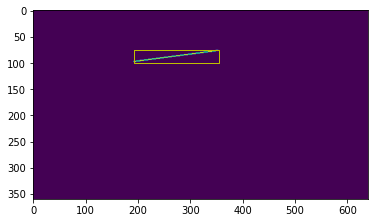

In [39]:
fig, ax = plt.subplots()

plt.imshow(mask_d)
ax.plot((192,192,354,354,192),(76,99,99,76,76), '-y', linewidth=1)
plt.show() 

In [55]:
import math
Distance_in_pixels = math.sqrt((props['bbox-0']-props['bbox-2'])**2 + (props['bbox-1']-props['bbox-3'])**2)
Distance_in_pixels

163.62457028209425

In [56]:
image3 = Image.open('/home/evida/Documents/Sensorbox_V2/sensor-box/server/static/images/edited/041_1_13_ulcer.png' )
width, height = image3.size
width

640

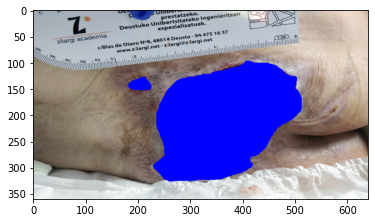

In [57]:
plt.imshow(image3)

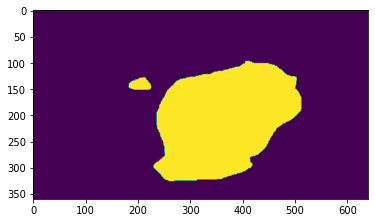

In [58]:
reds=np.array(image3)[:,:,0]
greens=np.array(image3)[:,:,1]
blues=np.array(image3)[:,:,2]
mask_u = (reds == 0) & (greens ==0 ) &  (blues ==255)
mask_u = np.where(mask_u, 255, 0)
plt.imshow(mask_u)

[[183. 128.]
 [225. 128.]
 [225. 151.]
 [183. 151.]]
[[190. 155.]
 [488.  74.]
 [542. 271.]
 [244. 352.]]


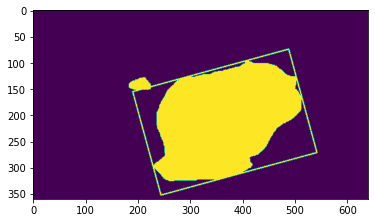

In [108]:
import cv2
import imutils
from imutils import contours,perspective

cnts = cv2.findContours(mask_u.astype('uint8'),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
for c in cnts:

    box = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
    box = np.array(box, dtype="int")
    box = perspective.order_points(box)
    print(box)
    plt.imshow(cv2.drawContours(mask_u.astype('uint8'), [box.astype("int")], -1, (255, 0, 0), 2))
    for (x, y) in box:
        cv2.circle(mask_u.astype('uint8'), (int(x), int(y)), 3, (255, 0,0), -1)


In [97]:
mask_u.shape

(360, 640)

In [72]:
_,contours,_ = cv2.findContours(mask_u.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

TypeError: Layout of the output array image is incompatible with cv::Mat (step[ndims-1] != elemsize or step[1] != elemsize*nchannels)

In [74]:
contours, hierarchy = cv2.findContours(mask_u.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

TypeError: Layout of the output array image is incompatible with cv::Mat (step[ndims-1] != elemsize or step[1] != elemsize*nchannels)